In [1]:
import shap
import xgboost

# get a dataset on income prediction
X,y = shap.datasets.adult()

# train an XGBoost model (but any other model type would also work)
model = xgboost.XGBClassifier()
model.fit(X, y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:56:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [2]:
print(y)

[False False False ... False False  True]


In [3]:
# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.explainers.GPUTree(model, X)
shap_values = explainer(X)

# get just the explanations for the positive class
#shap_values = shap_values

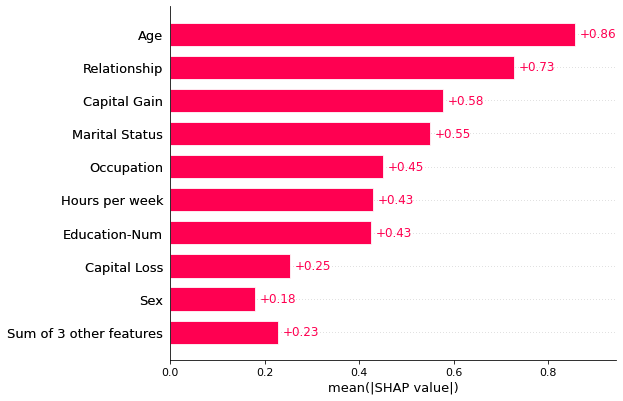

In [4]:
shap.plots.bar(shap_values)

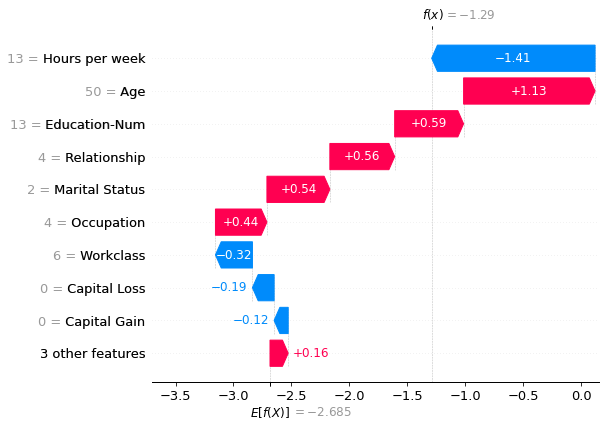

In [5]:
shap.plots.waterfall(shap_values[1])

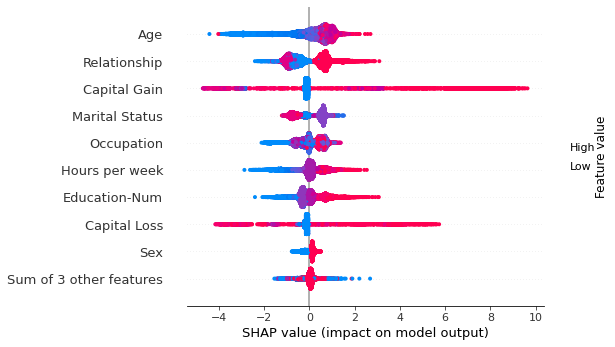

In [6]:
shap.plots.beeswarm(shap_values)

In [7]:
# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

100%|===================| 32540/32561 [00:43<00:00]        

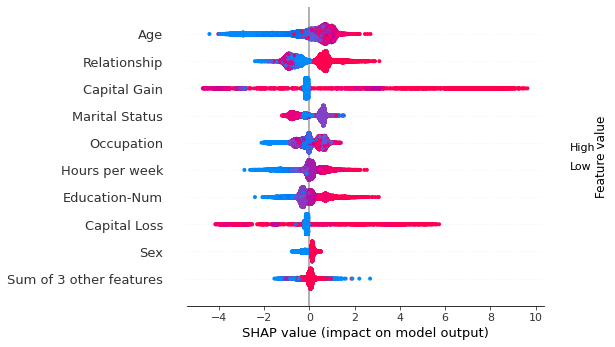

In [8]:
shap.plots.beeswarm(shap_values)